# 242 hw5

## 2. Implement stochastic gradient descent for logistic regression

### (a) Apply SGD algorithm to the un-normalized training set.

stochastic gradient descent: $\textbf{w}=\textbf{w}+\alpha(t_i-h_\textbf{w}(\textbf{x}_i))\textbf{x}_i$

$h_\textbf{w}(\textbf{x})=\sigma(\textbf{wx})=\frac{1}{1+\text{exp}(-\textbf{wx})}$

log likelihood: $\text{log}(L(\textbf{w}))=\sum^{N}_{i=1}t_i\text{log}(h_\textbf{w}(\textbf{x}_i))+(1-t_i)\text{log}(1-h_\textbf{w}(\textbf{x}_i))$

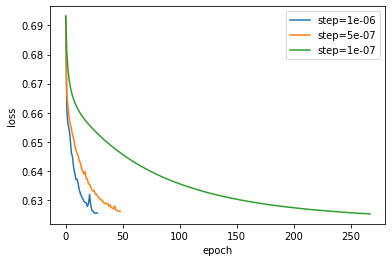

,step,time,epoch,training error,test error,training log likelihood,test log likelihood
0,1.000000e-06,0.152737,29.0,0.332248,0.363636,-0.625571,-0.626731
1,5.000000e-07,0.229979,49.0,0.332248,0.357143,-0.626092,-0.628160
2,1.000000e-07,1.217481,268.0,0.327362,0.337662,-0.625238,-0.627682


In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
%matplotlib inline

data = pd.read_csv('diabetes.csv', header=0)
x = data.iloc[:, :-1].values
x = np.c_[np.ones(x.shape[0]), x]  # add bias component column
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(x, y, w):
    h_w = sigmoid(x @ w)
    return -np.mean(y * np.log(h_w) + (1 - y) * np.log(1 - h_w))

def shuffle_data(x, y):
    data = np.c_[x, y]
    np.random.shuffle(data)
    return data[:, :-1], data[:, -1]

def predict(x, w):
    prob = sigmoid(x @ w)
    return (prob >= 0.5).astype(int)

def report(x_train, x_test, w):
    error_train = np.mean(predict(x_train, w) != y_train)
    error_test = np.mean(predict(x_test, w) != y_test)
    llh_train = - loss(x_train, y_train, w)
    llh_test = - loss(x_test, y_test, w)
    return [error_train, error_test, llh_train, llh_test]
    
def sgd(x, y, alpha=0.001, converge=1e-5):
    k = 0  # instance count
    e = 1  # epoch count
    n = len(y)
    w = np.zeros(x.shape[1])
    l = loss(x, y, w)
    l_list = [l]
    while True:        
        h_w = sigmoid(x[k, :] @ w)
        w += alpha * (y[k] - h_w) * x[k, :]
        k += 1
        if k >= n:
            k = 0
            e += 1
            x, y = shuffle_data(x, y)
            l = loss(x, y, w)
            l_list.append(l)
            if abs(l_list[-1] - l_list[-2]) < converge:  # converge criterion
                break       
    return l_list, w, e

step = [0.000001, 0.0000005, 0.0000001]
l_list = []
w_list = []
result = []
for s in step:
    start = time.time()
    l, w, e = sgd(x_train, y_train, alpha=s)
    t = round(time.time() - start, 6)
    r = report(x_train, x_test, w)
    l_list.append(l)
    w_list.append(w)
    result.append(np.r_[t, e, r])

for i in range(len(l_list)):
    plt.plot(l_list[i], label='step=' + str(step[i]))

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.savefig('sgd.png', dpi=270)
plt.show()
result = np.c_[step, result]
result = pd.DataFrame(result, columns=['step', 'time', 'epoch', 'training error', 'test error',
                                     'training log likelihood', 'test log likelihood'])
result

In [90]:
features = np.r_[['step', 'bias'], data.columns[:-1]]
weights = pd.DataFrame(np.c_[step, w_list], columns=features)
weights

,step,bias,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.000000e-06,-0.001647,0.009288,0.010924,-0.028182,0.002382,0.001646,-0.001563,0.000256,0.000372
1,5.000000e-07,-0.001175,0.006467,0.010188,-0.026180,0.000894,0.001510,-0.002115,0.000174,-0.000332
2,1.000000e-07,-0.000657,0.003352,0.008033,-0.021251,-0.001020,0.001470,-0.002466,0.000085,-0.001078


### (b) Apply SGD algorithm to the normalized training set.

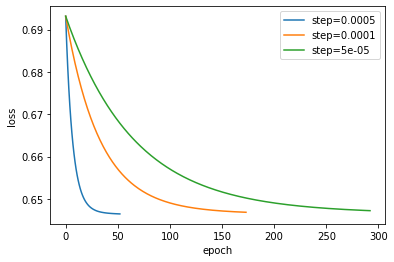

,step,time,epoch,training error,test error,training log likelihood,test log likelihood
0,0.00050,0.271201,53.0,0.348534,0.350649,-0.646435,-0.647755
1,0.00010,0.776652,174.0,0.348534,0.350649,-0.646822,-0.648056
2,0.00005,1.309833,293.0,0.348534,0.350649,-0.647203,-0.648383


In [141]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
data = pd.read_csv('diabetes.csv', header=0)
x = data.iloc[:, :-1].values
x_norm = normalize(x, axis=0)  # normalized data before split training and test sets
x_norm = np.c_[np.ones(x_norm.shape[0]), x_norm]  # add bias component column
y = data.iloc[:, -1].values

x_train_norm, x_test_norm, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, stratify=y, random_state=0)

step_norm = [0.0005, 0.0001, 0.00005]
l_list_norm = []
w_list_norm = []
result_norm = []
for s in step_norm:
    start = time.time()
    l1, w1, e1 = sgd(x_train_norm, y_train, alpha=s)
    t1 = round(time.time() - start, 6)
    r1 = report(x_train_norm, x_test_norm, w1)
    l_list_norm.append(l1)
    w_list_norm.append(w1)
    result_norm.append(np.r_[t1, e1, r1])

for i in range(len(l_list_norm)):
    plt.plot(l_list_norm[i], label='step=' + str(step_norm[i]))

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.savefig('sgd_norm.png', dpi=270)
plt.show()
result_norm = np.c_[step_norm, result_norm]
result_norm = pd.DataFrame(result_norm, columns=['step', 'time', 'epoch', 'training error', 'test error',
                                     'training log likelihood', 'test log likelihood'])
result_norm

In [147]:
features = np.r_[['step', 'bias'], data.columns[:-1]]
weights_norm = pd.DataFrame(np.c_[step_norm, w_list_norm], columns=features)
weights_norm

,step,bias,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.00050,-0.609992,0.024295,0.009660,-0.017152,-0.005860,0.020049,-0.004125,0.010153,0.002507
1,0.00010,-0.572148,0.011497,0.000638,-0.017226,-0.008645,0.010145,-0.008562,0.001784,-0.004042
2,0.00005,-0.547898,0.007875,-0.001726,-0.016812,-0.009154,0.007310,-0.009502,-0.000439,-0.005645


## 3. Apply decision tree classifier

First apply a decision tree classifier (we recommend the one with scikit learn) on the training set. Experiment with different maximum depths, and report their error rates on the training and test data. Also report the training times required. Should the training or test set accuracies be the same on the unnormalized data as the normalized data? Why or why not? Next, apply a random forrest learner (like sklearn.ensemble.RandomForrestClassifier) to the training data. Try a few different numbers of trees (perhaps 5, 20, and 100). Report the training and test accuracies of your forests.

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# read data
data = pd.read_csv('diabetes.csv', header=0)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_norm = normalize(x, axis=0)
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, stratify=y, random_state=0)
x_train_norm, x_test_norm, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, stratify=y, random_state=0)

def error(clf):
    start = time.time()
    clf.fit(x_train, y_train)
    t = round(time.time() - start, 6)
    error_train = 1 - clf.score(x_train, y_train)
    error_test = 1 - clf.score(x_test, y_test)
    start = time.time()
    clf.fit(x_train_norm, y_train)
    t_norm = round(time.time() - start, 6)
    error_train_norm = 1 - clf.score(x_train_norm, y_train)
    error_test_norm = 1 - clf.score(x_test_norm, y_test)
    return [t, error_train, error_test, t_norm, error_train_norm, error_test_norm]

depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
error_list = []
for d in depth:
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    error_list.append(error(clf))
table = np.c_[depth, error_list]
df = pd.DataFrame(table, columns=['max depth', 'time', 'training error', 'test error', 'time normalized', 
                                  'training error normalized', 'test error normalized'])
df

,max depth,time,training error,test error,time normalized,training error normalized,test error normalized
0,2.0,0.001092,0.236156,0.194805,0.001227,0.236156,0.194805
1,3.0,0.001452,0.232899,0.201299,0.001411,0.232899,0.201299
2,4.0,0.001641,0.216612,0.298701,0.001517,0.216612,0.298701
3,5.0,0.001827,0.146580,0.220779,0.001753,0.146580,0.220779
4,6.0,0.001882,0.128664,0.227273,0.001858,0.128664,0.227273
5,7.0,0.001937,0.089577,0.279221,0.001891,0.089577,0.279221
6,8.0,0.001960,0.052117,0.272727,0.002049,0.052117,0.272727
7,9.0,0.002024,0.032573,0.272727,0.002015,0.032573,0.272727
8,10.0,0.002044,0.016287,0.305195,0.002221,0.016287,0.305195
9,11.0,0.002078,0.000000,0.298701,0.002309,0.000000,0.298701


In [160]:
from sklearn.ensemble import RandomForestClassifier
def accuracy(rf):
    start = time.time()
    rf.fit(x_train, y_train)
    t = round(time.time() - start, 6)
    error_train = rf.score(x_train, y_train)
    error_test = rf.score(x_test, y_test)
    start = time.time()
    rf.fit(x_train_norm, y_train)
    t_norm = round(time.time() - start, 6)
    error_train_norm = rf.score(x_train_norm, y_train)
    error_test_norm = rf.score(x_test_norm, y_test)
    return [t, error_train, error_test, t_norm, error_train_norm, error_test_norm]

n_trees = [5, 10, 20, 30, 50, 100, 120, 150, 180, 200]
accuracy_list = []
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    accuracy_list.append(accuracy(rf))
table = np.c_[n_trees, accuracy_list]
df = pd.DataFrame(table, columns=['number of trees', 'time', 'training accuracy', 'test accuracy', 
                                  'time normalized', 'training accuracy normalized', 'test accuracy normalized'])
df

,number of trees,time,training accuracy,test accuracy,time normalized,training accuracy normalized,test accuracy normalized
0,5.0,0.010930,0.970684,0.766234,0.010016,0.969055,0.759740
1,10.0,0.016744,0.983713,0.785714,0.019258,0.983713,0.785714
2,20.0,0.034018,0.995114,0.792208,0.031853,0.995114,0.785714
3,30.0,0.043586,1.000000,0.792208,0.040965,1.000000,0.785714
4,50.0,0.069231,1.000000,0.792208,0.066586,1.000000,0.785714
5,100.0,0.123632,1.000000,0.805195,0.120456,1.000000,0.811688
6,120.0,0.145025,1.000000,0.805195,0.144588,1.000000,0.818182
7,150.0,0.189842,1.000000,0.805195,0.180692,1.000000,0.811688
8,180.0,0.215974,1.000000,0.805195,0.221788,1.000000,0.805195
9,200.0,0.244343,1.000000,0.805195,0.240228,1.000000,0.805195


## 4. Scikit learn has a neural network.MLPClassifier module

use that or something similar to train up a neural network on your $\textbf{normalized}$ training set. Experiment a bit with the number of hidden layers (say 1-4) and number of nodes on each layer (say 10 to 100). Report the training time and accuracies on the training set and test set. 

In [68]:
def warn(*args, **kwargs):  # hide sklearn warnings
    pass
import warnings
warnings.warn = warn  # hide sklearn warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

layers = [1, 2, 3, 4]
n_nodes = [(i + 1) * 10 for i in range(10)]
result = []
for l in layers:
    for n in n_nodes:
        size = [n] * int(l)
        nn = MLPClassifier(hidden_layer_sizes=size)
        start = time.time()
        nn.fit(x_train_norm, y_train)
        t = time.time() - start
        acc_train = nn.score(x_train_norm, y_train)
        acc_test = nn.score(x_test_norm, y_test)
        result.append([l, n, t, acc_train, acc_test])

df_nn = pd.DataFrame(result, columns=['number of hidden layers', 'number of nodes', 'time', 
                                      'training accuracy', 'test accuracy'])
df_nn 

,number of hidden layers,number of nodes,time,training accuracy,test accuracy
0,1,10,0.192563,0.726384,0.707792
1,1,20,0.202707,0.716612,0.707792
2,1,30,0.210962,0.754072,0.733766
3,1,40,0.221718,0.765472,0.759740
4,1,50,0.259377,0.755700,0.746753
5,1,60,0.266169,0.773616,0.759740
6,1,70,0.277805,0.773616,0.772727
7,1,80,0.289542,0.768730,0.772727
8,1,90,0.299412,0.776873,0.772727
9,1,100,0.309553,0.775244,0.779221


Neural network packages tend to have many tunable parameters. Explore the effects of them on the running time and goodness of the produced hypothesis. Some of the more interesting candidates for exploration might be momentum, solver, and alpha (the L2 penalty parameter).

In [139]:
# experiment different momentum
"""
momentum : float, default 0.9
Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.
"""
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
momentums = [i * 0.1 for i in range(11)]
result_m = []
for m in momentums:
    nn = MLPClassifier(momentum=m)
    start = time.time()
    nn.fit(x_train_norm, y_train)
    t = time.time() - start
    acc_train = nn.score(x_train_norm, y_train)
    acc_test = nn.score(x_test_norm, y_test)
    result_m.append([m, t, acc_train, acc_test])
df_m = pd.DataFrame(result_m, columns=['momentum', 'time', 'training accuracy', 'test accuracy'])
df_m

,momentum,time,training accuracy,test accuracy
0,0.0,0.348450,0.677524,0.668831
1,0.1,0.311008,0.688925,0.681818
2,0.2,0.312247,0.690554,0.701299
3,0.3,0.311836,0.680782,0.668831
4,0.4,0.313538,0.695440,0.720779
5,0.5,0.312708,0.690554,0.688312
6,0.6,0.312986,0.692182,0.701299
7,0.7,0.310114,0.701954,0.707792
8,0.8,0.309573,0.703583,0.714286
9,0.9,0.316080,0.701954,0.714286


In [70]:
# experiment different solver
solvers = ['lbfgs', 'sgd', 'adam']
result_s = []
for s in solvers:
    nn = MLPClassifier(solver=s)
    start = time.time()
    nn.fit(x_train_norm, y_train)
    t = time.time() - start
    acc_train = nn.score(x_train_norm, y_train)
    acc_test = nn.score(x_test_norm, y_test)
    result_s.append([s, t, acc_train, acc_test])
df_s = pd.DataFrame(result_s, columns=['solver', 'time', 'training accuracy', 'test accuracy'])
df_s

,solver,time,training accuracy,test accuracy
0,lbfgs,0.173007,0.837134,0.818182
1,sgd,0.291408,0.651466,0.649351
2,adam,0.311353,0.762215,0.772727


In [71]:
# experiment alpha : float, optional, default 0.0001
# L2 penalty (regularization term) parameter.
alphas = [0.01, 0.001, 0.0001, 0.00001]
result_a = []
for a in alphas:
    nn = MLPClassifier(alpha=a)
    start = time.time()
    nn.fit(x_train_norm, y_train)
    t = time.time() - start
    acc_train = nn.score(x_train_norm, y_train)
    acc_test = nn.score(x_test_norm, y_test)
    result_a.append([a, t, acc_train, acc_test])
df_a = pd.DataFrame(result_a, columns=['alpha', 'time', 'training accuracy', 'test accuracy'])
df_a

,alpha,time,training accuracy,test accuracy
0,0.01000,0.320981,0.767101,0.772727
1,0.00100,0.306654,0.768730,0.785714
2,0.00010,0.310782,0.776873,0.772727
3,0.00001,0.308720,0.770358,0.766234


## Question 5

$a_j=\sum w_{ji}z_i$

Relu: $z_j=\sigma (a_j)=\texttt{max}(0, a_j)$

Error of output: $E=\frac{1}{2}(z_6-t)^2$

For each node j, update: $w_{ji}=w_{ji}-\eta \frac{\partial E}{\partial w_{ji}}$

For output node: $\frac{\partial E}{\partial w_{ji}}=\frac{\partial E}{\partial a_{j}} \frac{\partial a_j}{\partial w_{ji}}=\frac{\partial E}{\partial a_{j}}z_i$  where $\frac{\partial E}{\partial a_{j}}=\delta_j$

For hidden nodes j, $\frac{\partial E}{\partial a_j}=\big(\sum \frac{\partial E}{\partial a_k}w_{kj}\big)\frac{\partial z_j}{\partial a_j}$

$\frac{\partial E}{\partial w_{ji}}=\big(\sum\frac{\partial E}{\partial a_k}w_{kj}\big)z_i  \frac{\partial z_j}{\partial a_j}$

In [45]:
import numpy as np
def forward(w_ji, z_i):
    a_j = w_ji @ z_i
    z_j = max(0, a_j)
    return z_j

def backward(E_partial_a_k, w_k, z_j):
    E_partial_a_j = np.array([E_partial_a_k]) @ np.array([w_k]) * (z_j > 0)
    return E_partial_a_j

w_3 = np.array([1, 1])
w_4 = np.array([1, -1])
w_5 = np.array([-1, -1])
w_6 = np.array([1, 1, 1])
z_1, z_2 = 1, 2
inp = np.array([z_1, z_2])
z_3 = forward(w_3, inp)
z_4 = forward(w_4, inp)
z_5 = forward(w_5, inp)    
z_6 = forward(w_6, np.array([z_3, z_4, z_5]))
# squared error
t = 2
E = 0.5 * ((z_6 - t) ** 2)
print(z_6)

3


$\frac{\partial E}{\partial a_6} = 3-2 = 1$


In [46]:
print(z_3, z_4, z_5, z_6)

3 0 0 3


In [47]:
E_partial_a6 = 1 
E_partial_w6 = E_partial_a6 * np.array([z_3, z_4, z_5])
E_partial_w6

array([3, 0, 0])

In [48]:
E_partial_a3 = backward(E_partial_a6, w_6[0], z_3)
E_partial_a4 = backward(E_partial_a6, w_6[1], z_4)
E_partial_a5 = backward(E_partial_a6, w_6[2], z_5)
print(E_partial_a3, E_partial_a4, E_partial_a5)

1 0 0


In [49]:
E_partial_w3 = E_partial_a3 * inp
E_partial_w4 = E_partial_a4 * inp
E_partial_w5 = E_partial_a5 * inp
print(E_partial_w3, E_partial_w4, E_partial_w5)

[1 2] [0 0] [0 0]


In [50]:
eta = 0.1
w_6 = w_6 - eta * E_partial_w6
w_3 = w_3 - eta * E_partial_w3
w_4 = w_4 - eta * E_partial_w4
w_5 = w_5 - eta * E_partial_w5
print(w_3, w_4, w_5, w_6)

[0.9 0.8] [ 1. -1.] [-1. -1.] [0.7 1.  1. ]
